Réalisé par:


*  Karim Ellouze
*   Selma Guedidi
*  Ahmed Aziz Boussaid


In [ ]:
!pip install  np_utils tensorflow

# Construction du 1er réseau



## Importer les données

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras import utils
from keras import backend as K
K.set_image_data_format('channels_first')

seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [ ]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [ ]:
#one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
def get_data_mnist():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize input images
    X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    X_train /= 255
    X_test /= 255
    # One-hot encode outputs
    y_train = utils.to_categorical(y_train)
    y_test = utils.to_categorical(y_test)

    # Number of classes
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes

## Construire le modèle de CNN

In [ ]:

def small_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28),activation='relu'))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return model

In [ ]:
def small_model_v2():
  model = Sequential()

  model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))

  # Output layer with num_classes units and softmax activation
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [ ]:
def small_model_v3():
  model = Sequential()

  model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3),  activation='relu'))

  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))

  # Output layer with num_classes units and softmax activation
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

## Entrainer et évaluer notre Small CNN

In [ ]:
model= small_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
300/300 [==============================] - 5s 12ms/step - loss: 0.5044 - accuracy: 0.9369 - val_loss: 0.0807 - val_accuracy: 0.9740
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0726 - val_accuracy: 0.9794
Epoch 3/10
300/300 [==============================] - 6s 18ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0718 - val_accuracy: 0.9807
Epoch 4/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0821 - val_accuracy: 0.9798
Epoch 5/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0942 - val_accuracy: 0.9792
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.1062 - val_accuracy: 0.9771
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.1128 - val_accuracy: 0.9783

In [ ]:
def print_model_error_rate(model, X_test, y_test):
 # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Model score : %.2f%%" % (scores[1]*100))
  print("Model error rate : %.2f%%" % (100-scores[1]*100))

In [ ]:
print_model_error_rate(model, X_test, y_test)

Model score : 98.07%
Model error rate : 1.93%


# Construction des 3 modèles après normalisation de données

In [ ]:
model= small_model_v2()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
print_model_error_rate(model, X_test, y_test)

Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 1.5660 - accuracy: 0.8781 - val_loss: 0.1102 - val_accuracy: 0.9696
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1103 - accuracy: 0.9676 - val_loss: 0.0738 - val_accuracy: 0.9782
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0636 - val_accuracy: 0.9814
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0666 - val_accuracy: 0.9809
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0616 - val_accuracy: 0.9834
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0612 - val_accuracy: 0.9842
Epoch 

In [ ]:
model= small_model_v3()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
print_model_error_rate(model, X_test, y_test)

Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 0.7363 - accuracy: 0.8776 - val_loss: 0.1015 - val_accuracy: 0.9672
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1063 - accuracy: 0.9686 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0541 - val_accuracy: 0.9852
Epoch 

In [ ]:
# This function saves a model on the drive using two files: a json and a h5
def save_keras_model(model, filename):
  # serialize model to JSON
  model_json = model.to_json()
  with open(filename+".json", "w") as json_file:
    json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(filename+".h5")

In [ ]:
save_keras_model(model,"cnn")

# Sauvegarde et chargements des modèles Keras

In [ ]:
from keras.models import model_from_json

In [ ]:
def load_keras_model(filename):
 # load json and create model
 json_file = open(filename+".json", 'r')
 loaded_model_json = json_file.read()
 json_file.close()
 loaded_model = model_from_json(loaded_model_json)
 # load weights into new model
 loaded_model.load_weights(filename+".h5")
 return loaded_model

In [ ]:
loded_model=load_keras_model("cnn")
loded_model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
print_model_error_rate(loded_model, X_test, y_test)

Model score : 98.77%
Model error rate : 1.23%


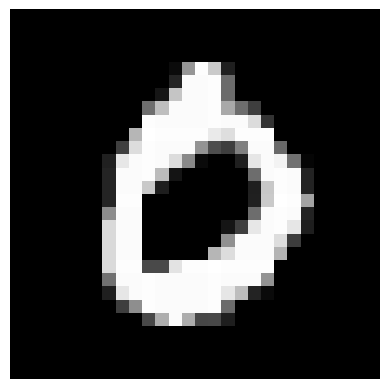

In [ ]:
image_index = 3 # You can change this index to see different images
image = X_test[image_index]
import matplotlib.pyplot as plt

image = image.reshape((28, 28))
# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image_index = 3 # You can change this index to see different images
image = X_test[image_index]
image = image.reshape((1, 1,28, 28)).astype('float32')  # Reshape for model input
image /= 255
predictions = loded_model.predict(image)

# Print the predicted probabilities for each class
print("Predicted probabilities:", predictions)

# Get the predicted class label
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class-1)

1/1 [==============================] - 0s 91ms/step
Predicted probabilities: [[0.10242506 0.10250051 0.09573648 0.09776381 0.10407599 0.09311145
  0.09676944 0.09458271 0.10919998 0.10383461]]
Predicted class: 7


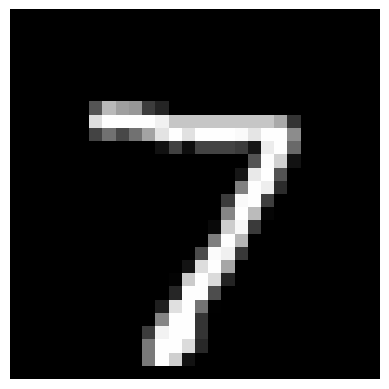

1/1 [==============================] - 0s 31ms/step
Predicted probabilities: [[9.4190843e-15 2.7277135e-06 1.0436617e-11 5.7368212e-08 7.9284266e-15
  1.4963506e-12 1.8633817e-09 9.9999726e-01 2.6473637e-13 1.7706581e-11]]
Predicted class: 7


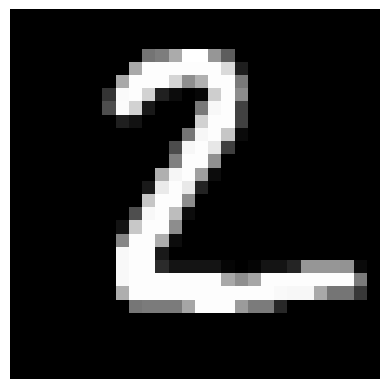

1/1 [==============================] - 0s 32ms/step
Predicted probabilities: [[2.9583875e-15 4.3788692e-13 1.0000000e+00 3.0117299e-18 1.6880622e-10
  8.7994255e-15 6.1207395e-09 5.2541055e-19 2.1608149e-14 4.7153205e-20]]
Predicted class: 2


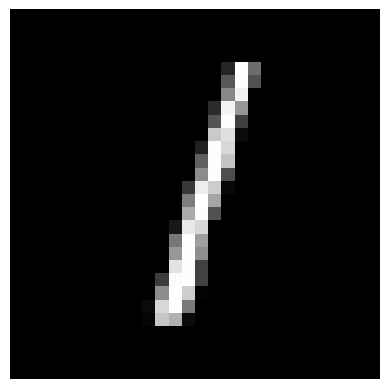

1/1 [==============================] - 0s 33ms/step
Predicted probabilities: [[2.4674516e-09 9.9999797e-01 7.1687822e-08 5.6999777e-13 1.3252543e-06
  1.2727326e-09 1.4918086e-07 9.6270753e-08 4.0182954e-07 1.3593672e-09]]
Predicted class: 1


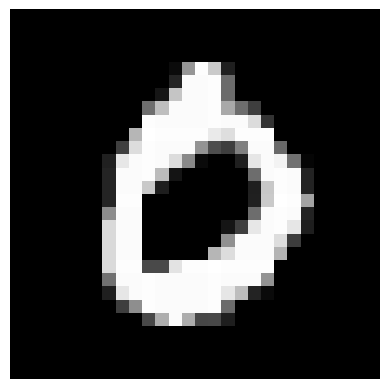

1/1 [==============================] - 0s 29ms/step
Predicted probabilities: [[9.9999750e-01 8.0536272e-10 6.2333787e-09 2.3277689e-09 2.1581883e-08
  2.8869957e-11 1.2197476e-06 1.6362428e-07 3.8794499e-11 1.1033286e-06]]
Predicted class: 0


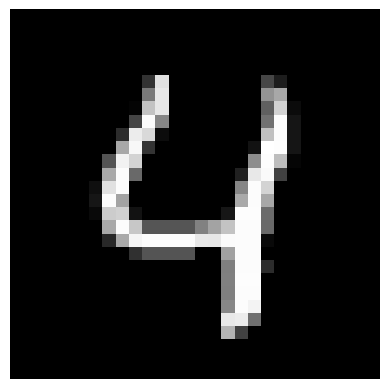

1/1 [==============================] - 0s 28ms/step
Predicted probabilities: [[3.3479617e-12 4.3371461e-13 6.1422332e-15 2.9212908e-20 9.9999905e-01
  3.5576901e-21 8.7531114e-16 6.0788709e-17 3.2162660e-12 9.1716936e-07]]
Predicted class: 4


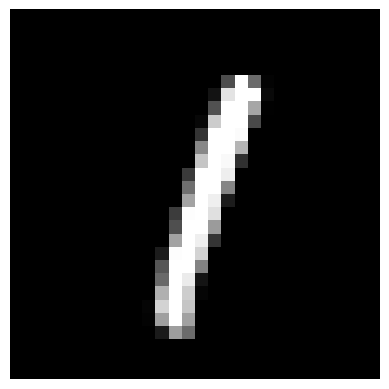

1/1 [==============================] - 0s 25ms/step
Predicted probabilities: [[5.9632750e-11 1.0000000e+00 3.2367037e-10 6.4672824e-16 1.2077326e-09
  2.5097155e-12 3.7535415e-09 1.9363791e-08 7.3718764e-09 2.3197456e-11]]
Predicted class: 1


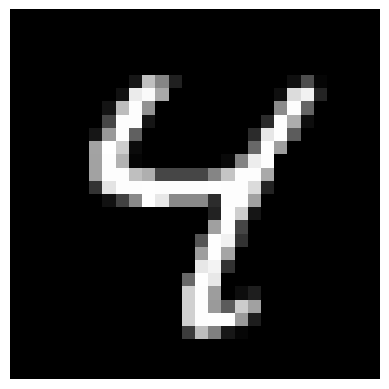

1/1 [==============================] - 0s 29ms/step
Predicted probabilities: [[4.3715884e-10 2.6443525e-09 1.1441805e-08 3.4254561e-12 9.9706274e-01
  5.0511945e-11 3.3302961e-12 8.4338821e-11 5.6962358e-06 2.9315825e-03]]
Predicted class: 4


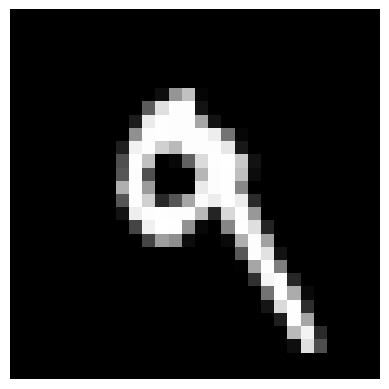

1/1 [==============================] - 0s 24ms/step
Predicted probabilities: [[4.1172579e-11 2.1582180e-11 2.9893147e-12 7.2807369e-09 4.4116547e-07
  2.2133183e-10 5.3425051e-12 1.3232797e-10 4.9584634e-09 9.9999952e-01]]
Predicted class: 9


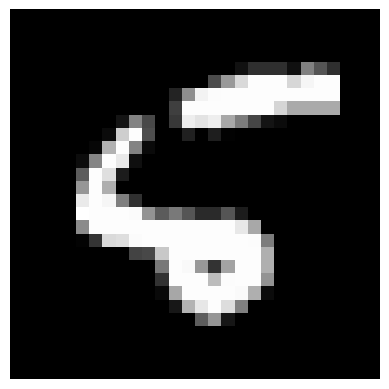

1/1 [==============================] - 0s 31ms/step
Predicted probabilities: [[2.3733012e-12 9.5527739e-08 3.4521946e-10 9.4250330e-16 5.3372626e-11
  9.9976701e-01 2.3281061e-04 4.2131090e-09 6.5368049e-08 1.8022224e-09]]
Predicted class: 5


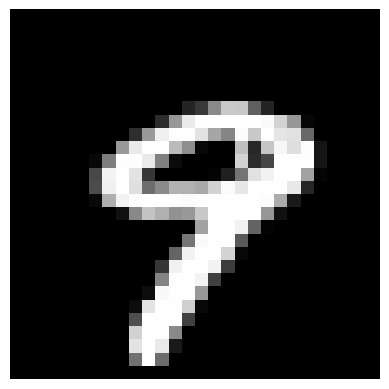

1/1 [==============================] - 0s 28ms/step
Predicted probabilities: [[2.1016422e-12 3.2413685e-13 3.0679445e-11 2.7745805e-12 2.6567517e-07
  3.1224767e-10 1.2605302e-12 2.8547642e-09 2.0945132e-10 9.9999976e-01]]
Predicted class: 9


In [ ]:
for image_index in range(10):
  # Choose one instance
  image = X_test[image_index]
  image_display = image.reshape((28, 28))
  image = image.reshape((1, 1, 28, 28 )).astype('float32')  # Reshape for model input

  plt.imshow(image_display, cmap='gray')
  plt.axis('off')
  plt.show()
  loded_model.reset_states()
  predictions = loded_model.predict(image)

  # Print the predicted probabilities for each class
  print("Predicted probabilities:", predictions)

  # Get the predicted class label
  predicted_class = np.argmax(predictions)
  print("Predicted class:", predicted_class -1)

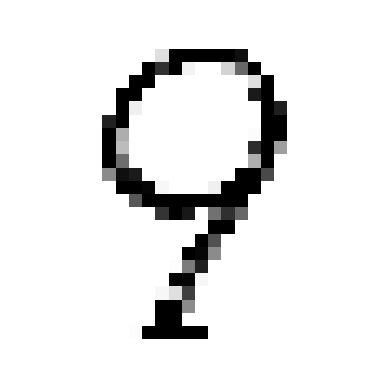

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
image_path = "nine.png"
img = load_img(image_path, target_size=(  28, 28), color_mode="grayscale")

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
image = image.reshape((1, 1, 28, 28 )).astype('float32')  # Reshape for model input

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
predictions = loded_model.predict(x)

# Print the predicted probabilities for each class
print("Predicted probabilities:", predictions)

# Get the predicted class label
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 20ms/step
Predicted probabilities: [[2.2726463e-01 1.9166566e-01 4.5359087e-01 5.9778687e-02 1.8862624e-05
  1.4485923e-02 5.5799569e-04 2.5726040e-03 1.5152815e-03 4.8549548e-02]]
Predicted class: 2
